# Perform EDA for Crashes_Last_Five_Years.csv dataset


Learn to perform EDA to uncover relationships amongst the variables, anomalies in data and identify important features. 

Source: https://growingdata.com.au/a-guided-introduction-to-exploratory-data-analysis-eda-using-python/

In [1]:
# working directory
import os
os.getcwd()

'/Users/kavyaannapareddy/Desktop/Projects/python/wip/EDA'

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data file into variable - data
data= pd.read_csv('/Users/kavyaannapareddy/Desktop/Projects/python/wip/EDA/Crashes_Last_Five_Years.csv')

In [4]:
# to display all the columns 
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,POLICE_ATTEND,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,RUN_OFFROAD,NODE_ID,LONGITUDE,LATITUDE,NODE_TYPE,LGA_NAME,REGION_NAME,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,145.003865,-37.894103,3402744,T20130015887,ABS to receive accident,Finished,1/8/2013,16.15.00,No,Collision with vehicle,Thursday,REAR END(VEHICLES IN SAME LANE),No,Day,Yes,T intersection,Other injury accident,80 km/hr,No,54909,145.00387,-37.89410,Intersection,GLEN EIRA,METROPOLITAN SOUTH EAST REGION,2500339.989,2400778.106,5,1,0,0,1,4,3,2,0,1,4,0,0,0,0,0,0,0,0,1,No,0,4,0,4,0,0,MELB_URBAN,MELB_URBAN,"GLEN EIRA,BAYSIDE",METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Highway,"Arterial Highway,Local Road",Divided,"Div,Undiv",Metro
1,145.360983,-37.755923,3402745,T20130015889,ABS to receive accident,Finished,1/8/2013,17.50.00,No,Collision with vehicle,Thursday,REAR END(VEHICLES IN SAME LANE),No,Dark Street lights on,Yes,Not at intersection,Other injury accident,80 km/hr,No,262418,145.36098,-37.75592,Non-Intersection,YARRA RANGES,METROPOLITAN SOUTH EAST REGION,2531808.684,2416054.063,3,1,0,0,1,2,1,2,0,0,3,0,0,0,0,0,0,0,0,0,No,0,3,0,3,0,0,MELB_URBAN,MELB_URBAN,YARRA RANGES,METROPOLITAN SOUTH EAST REGION,B,B,Arterial Highway,Arterial Highway,Divided,Div,Metro
2,144.973222,-37.807724,3402746,T20130015892,ABS to receive accident,Finished,1/8/2013,18.14.00,Yes,Collision with vehicle,Thursday,VEHICLE OFF FOOTPATH STRIKES VEH ON CARRIAGEWAY,No,Dark Street lights on,Yes,Cross intersection,Serious injury accident,50 km/hr,No,222039,144.97322,-37.80772,Intersection,YARRA,METROPOLITAN NORTH WEST REGION,2497642.009,2410364.904,2,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,No,0,2,0,1,0,0,MELB_URBAN,MELB_URBAN,"YARRA,MELBOURNE",METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Divided,"Div,Undiv",Metro
3,145.026719,-37.770118,3402747,T20130015893,ABS to receive accident,Finished,1/8/2013,18.15.00,Yes,Collision with vehicle,Thursday,RIGHT THROUGH,No,Dark Street lights on,Yes,Cross intersection,Other injury accident,60 km/hr,No,38086,145.02672,-37.77012,Intersection,DAREBIN,METROPOLITAN NORTH WEST REGION,2502353.962,2414538.590,2,1,0,0,1,1,2,0,0,0,1,0,0,1,0,0,0,0,0,0,No,0,2,0,1,1,0,MELB_URBAN,MELB_URBAN,DAREBIN,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undiv,Metro
4,145.055800,-37.679149,3402748,T20130015894,ABS to receive accident,Finished,1/8/2013,16.30.00,No,Collision with a fixed object,Thursday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,Day,Yes,Not at intersection,Other injury accident,50 km/hr,Yes,262419,145.05580,-37.67915,Non-Intersection,WHITTLESEA,METROPOLITAN NORTH WEST REGION,2504921.915,2424633.538,2,1,0,0,1,1,2,0,0,0,2,0,0,0,0,0,0,0,0,1,No,0,2,0,2,0,0,MELB_URBAN,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro


In [6]:

data.shape

(74908, 65)

In [7]:
data.dtypes.value_counts()

object     31
int64      28
float64     6
dtype: int64

In [8]:
data_features_list= data.columns.values
data_features_list

array(['X', 'Y', 'OBJECTID', 'ACCIDENT_NO', 'ABS_CODE', 'ACCIDENT_STATUS',
       'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME', 'ACCIDENT_TYPE',
       'DAY_OF_WEEK', 'DCA_CODE', 'HIT_RUN_FLAG', 'LIGHT_CONDITION',
       'POLICE_ATTEND', 'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'RUN_OFFROAD', 'NODE_ID', 'LONGITUDE', 'LATITUDE', 'NODE_TYPE',
       'LGA_NAME', 'REGION_NAME', 'VICGRID_X', 'VICGRID_Y',
       'TOTAL_PERSONS', 'INJ_OR_FATAL', 'FATALITY', 'SERIOUSINJURY',
       'OTHERINJURY', 'NONINJURED', 'MALES', 'FEMALES', 'BICYCLIST',
       'PASSENGER', 'DRIVER', 'PEDESTRIAN', 'PILLION', 'MOTORIST',
       'UNKNOWN', 'PED_CYCLIST_5_12', 'PED_CYCLIST_13_18',
       'OLD_PEDESTRIAN', 'OLD_DRIVER', 'YOUNG_DRIVER', 'ALCOHOL_RELATED',
       'UNLICENCSED', 'NO_OF_VEHICLES', 'HEAVYVEHICLE',
       'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE',
       'DEG_URBAN_NAME', 'DEG_URBAN_ALL', 'LGA_NAME_ALL',
       'REGION_NAME_ALL', 'SRNS', 'SRNS_ALL', 'RMA', 'RMA_ALL', 'DIVIDED',


In [9]:
# consider only some variables 
num_features_list= ["INJ_OR_FATAL","FATALITY","MALES",
       "FEMALES","DRIVER","PEDESTRIAN",
       "OLD_DRIVER","YOUNG_DRIVER" ,"UNLICENCSED",
       "HEAVYVEHICLE","PASSENGERVEHICLE","MOTORCYCLE"]
cat_features_list= [ "ACCIDENT_TIME","ACCIDENT_TYPE","DAY_OF_WEEK",
        "DCA_CODE","HIT_RUN_FLAG","LIGHT_CONDITION",
        "ROAD_GEOMETRY","SPEED_ZONE"]
num_features= data[num_features_list]
cat_features= data[cat_features_list]
num_features


,INJ_OR_FATAL,FATALITY,MALES,FEMALES,DRIVER,PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE
0,1,0,3,2,4,0,0,1,0,0,4,0
1,1,0,1,2,3,0,0,0,0,0,3,0
2,1,0,1,1,1,0,0,0,0,0,1,0
3,1,0,2,0,1,0,0,0,0,0,1,1
4,1,0,2,0,2,0,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74903,1,0,0,2,1,1,0,0,0,0,1,0
74904,2,0,2,1,2,0,1,0,0,0,2,0
74905,1,0,2,3,2,0,0,0,0,0,2,0
74906,1,0,1,0,0,0,0,0,0,0,0,1


In [10]:
cat_features

,ACCIDENT_TIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,ROAD_GEOMETRY,SPEED_ZONE
0,16.15.00,Collision with vehicle,Thursday,REAR END(VEHICLES IN SAME LANE),No,Day,T intersection,80 km/hr
1,17.50.00,Collision with vehicle,Thursday,REAR END(VEHICLES IN SAME LANE),No,Dark Street lights on,Not at intersection,80 km/hr
2,18.14.00,Collision with vehicle,Thursday,VEHICLE OFF FOOTPATH STRIKES VEH ON CARRIAGEWAY,No,Dark Street lights on,Cross intersection,50 km/hr
3,18.15.00,Collision with vehicle,Thursday,RIGHT THROUGH,No,Dark Street lights on,Cross intersection,60 km/hr
4,16.30.00,Collision with a fixed object,Thursday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,Day,Not at intersection,50 km/hr
...,...,...,...,...,...,...,...,...
74903,15.00.00,Struck Pedestrian,Saturday,PED EMERGES FROM IN FRONT OF PARKED OR STATION...,No,Day,Not at intersection,40 km/hr
74904,16.00.00,Collision with vehicle,Friday,REAR END(VEHICLES IN SAME LANE),No,Day,Not at intersection,70 km/hr
74905,15.45.00,Collision with vehicle,Saturday,RIGHT THROUGH,No,Day,Cross intersection,60 km/hr
74906,17.00.00,Vehicle overturned (no collision),Saturday,OFF CARRIAGEWAY TO LEFT,No,Day,Not at intersection,100 km/hr


In [11]:
# target is to find out if a crash was due to alcohol consumption or not
data['ALCOHOL_RELATED'].value_counts()

No     72429
Yes     2479
Name: ALCOHOL_RELATED, dtype: int64

In [12]:
num_features.describe()

,INJ_OR_FATAL,FATALITY,MALES,FEMALES,DRIVER,PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE
count,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000
mean,1.263817,0.018903,1.318591,0.951487,1.456507,0.100777,0.065721,0.300796,0.033241,0.045990,1.423159,0.152681
std,0.699218,0.147931,1.006499,1.080965,0.887111,0.328680,0.253757,0.518658,0.180453,0.221363,0.910647,0.368627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
max,27.000000,4.000000,46.000000,51.000000,12.000000,9.000000,3.000000,5.000000,2.000000,4.000000,13.000000,5.000000


In [13]:

alcohol_related_yes= data[data['ALCOHOL_RELATED']== 'Yes']
alcohol_related_yes.describe()

,X,Y,OBJECTID,NODE_ID,LONGITUDE,LATITUDE,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE
count,2479.000000,2479.000000,2.479000e+03,2479.000000,2479.000000,2479.000000,2.479000e+03,2.479000e+03,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,144.889969,-37.639078,3.438036e+06,249389.755547,144.889969,-37.639078,2.489992e+06,2.428578e+06,1.704316,1.318677,0.057685,0.657927,0.603066,0.385639,1.211376,0.452198,0.013312,0.365470,1.156918,0.033885,0.005647,0.109318,0.019766,0.000403,0.004034,0.002824,0.016942,0.311819,0.091166,1.467527,0.027430,1.288826,0.109318,0.004034
std,1.027619,0.750633,2.179482e+04,103266.768450,1.027619,0.750633,9.137898e+04,8.289777e+04,1.183738,0.758659,0.268580,0.753770,0.739581,0.836353,0.921722,0.727663,0.118097,0.838174,0.647201,0.207947,0.074952,0.321025,0.177453,0.020085,0.063397,0.053074,0.129081,0.504205,0.287903,0.756766,0.175283,0.818274,0.321025,0.063397
min,141.144150,-38.792599,3.401746e+06,100.000000,141.144150,-38.792600,2.144161e+06,2.299967e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,144.598845,-38.018070,3.418838e+06,264158.500000,144.598845,-38.018070,2.464663e+06,2.386759e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,145.024652,-37.821650,3.438102e+06,289806.000000,145.024650,-37.821650,2.502167e+06,2.408584e+06,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,145.255956,-37.623625,3.457409e+06,315043.000000,145.255955,-37.623625,2.522429e+06,2.430095e+06,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
max,149.740253,-34.147331,3.476529e+06,343454.000000,149.740250,-34.147330,2.918681e+06,2.812367e+06,11.000000,9.000000,4.000000,7.000000,7.000000,8.000000,7.000000,5.000000,2.000000,8.000000,6.000000,4.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,6.000000,3.000000,6.000000,3.000000,1.000000


In [14]:
alcohol_related_no= data[data['ALCOHOL_RELATED']=='No']
alcohol_related_no.describe()

,X,Y,OBJECTID,NODE_ID,LONGITUDE,LATITUDE,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE
count,72429.000000,72429.000000,7.242900e+04,72429.000000,72429.000000,72429.000000,7.242900e+04,7.242900e+04,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000
mean,144.974557,-37.711733,3.439237e+06,202841.310732,144.974557,-37.711733,2.497668e+06,2.420712e+06,2.411506,1.261939,0.017576,0.324608,0.919756,1.149567,1.322260,0.968576,0.109873,0.519626,1.466761,0.103066,0.005647,0.153930,0.052562,0.009513,0.016872,0.020310,0.067390,0.300418,0.031258,1.817476,0.046625,1.427757,0.154165,0.012923
std,0.805523,0.559645,2.161741e+04,126023.976227,0.805523,0.559645,7.152369e+04,6.181115e+04,1.545047,0.697023,0.141815,0.580504,0.757646,1.359685,1.009079,1.086986,0.323881,1.244568,0.892409,0.331798,0.076031,0.369616,0.357619,0.104600,0.133322,0.144348,0.256792,0.519145,0.175281,0.745312,0.222745,0.913299,0.370060,0.113796
min,140.966483,-39.023989,3.401744e+06,4.000000,140.966480,-39.023990,2.129485e+06,2.274527e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,144.854739,-37.947632,3.420535e+06,45836.000000,144.854740,-37.947630,2.487199e+06,2.394735e+06,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,145.012388,-37.815797,3.439234e+06,274197.000000,145.012390,-37.815800,2.501090e+06,2.409434e+06,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,145.201383,-37.698600,3.457940e+06,307360.000000,145.201380,-37.698600,2.517720e+06,2.422370e+06,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
max,149.757468,-34.127672,3.476651e+06,343479.000000,149.757470,-34.127670,2.920148e+06,2.814427e+06,97.000000,27.000000,4.000000,17.000000,25.000000,87.000000,46.000000,51.000000,8.000000,95.000000,12.000000,9.000000,2.000000,5.000000,52.000000,8.000000,3.000000,3.000000,3.000000,5.000000,2.000000,14.000000,4.000000,13.000000,5.000000,2.000000


In [15]:
num_features.describe()

,INJ_OR_FATAL,FATALITY,MALES,FEMALES,DRIVER,PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE
count,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000
mean,1.263817,0.018903,1.318591,0.951487,1.456507,0.100777,0.065721,0.300796,0.033241,0.045990,1.423159,0.152681
std,0.699218,0.147931,1.006499,1.080965,0.887111,0.328680,0.253757,0.518658,0.180453,0.221363,0.910647,0.368627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
max,27.000000,4.000000,46.000000,51.000000,12.000000,9.000000,3.000000,5.000000,2.000000,4.000000,13.000000,5.000000


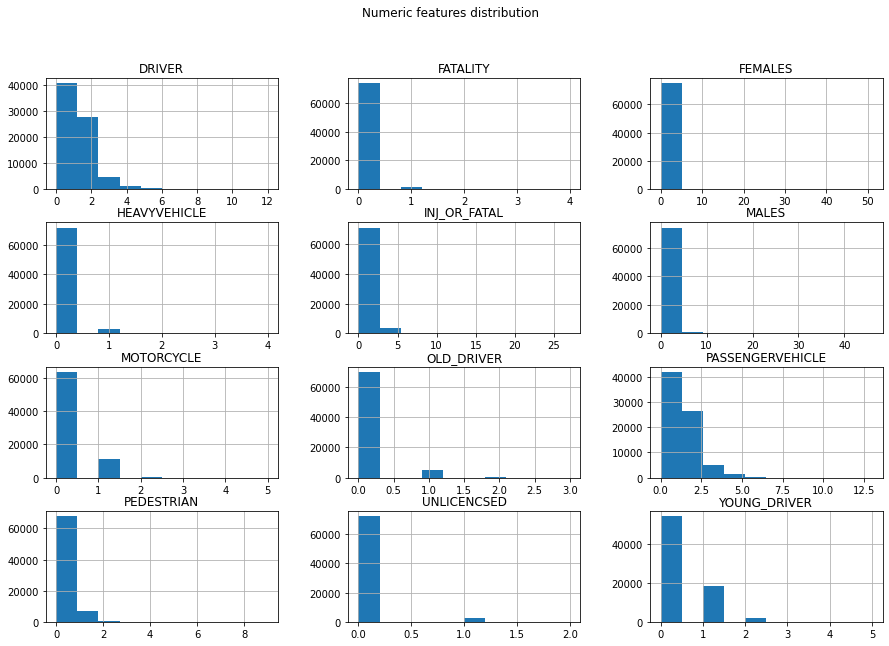

In [16]:
num_features.hist(figsize=(15,10))
plt.suptitle('Numeric features distribution')
plt.show()

In [17]:
for i, value in enumerate(num_features_list):
    print(i, value)

0 INJ_OR_FATAL
1 FATALITY
2 MALES
3 FEMALES
4 DRIVER
5 PEDESTRIAN
6 OLD_DRIVER
7 YOUNG_DRIVER
8 UNLICENCSED
9 HEAVYVEHICLE
10 PASSENGERVEHICLE
11 MOTORCYCLE


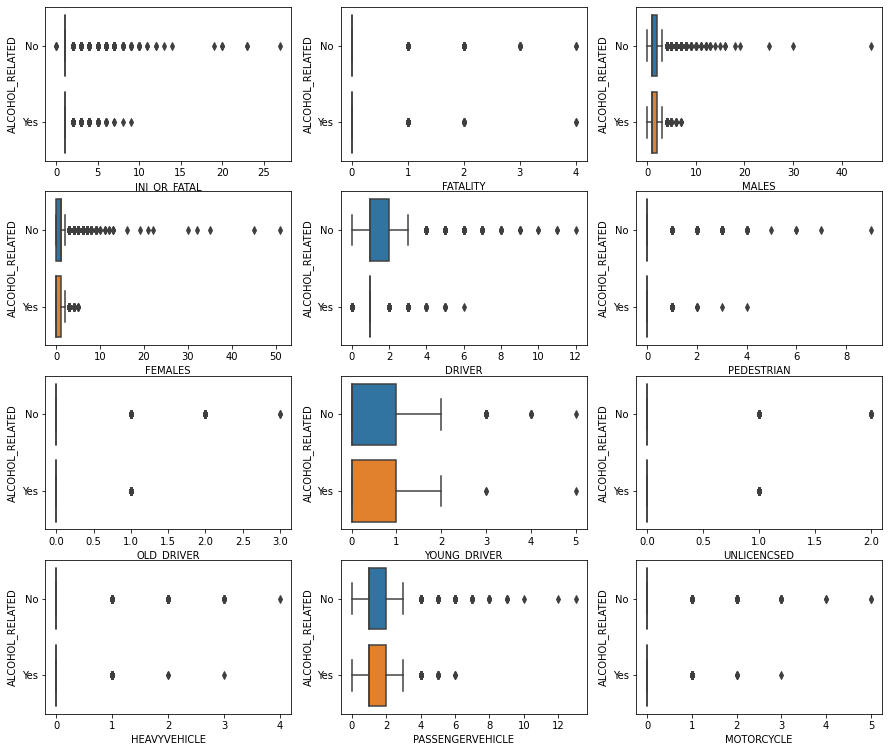

In [18]:
fig, ax= plt.subplots(round(len(num_features_list)/3),3, figsize=(15,13))
for i, ax in enumerate(fig.axes):
    sns.boxplot( x= num_features_list[i], y= 'ALCOHOL_RELATED', data= data,ax=ax)
    

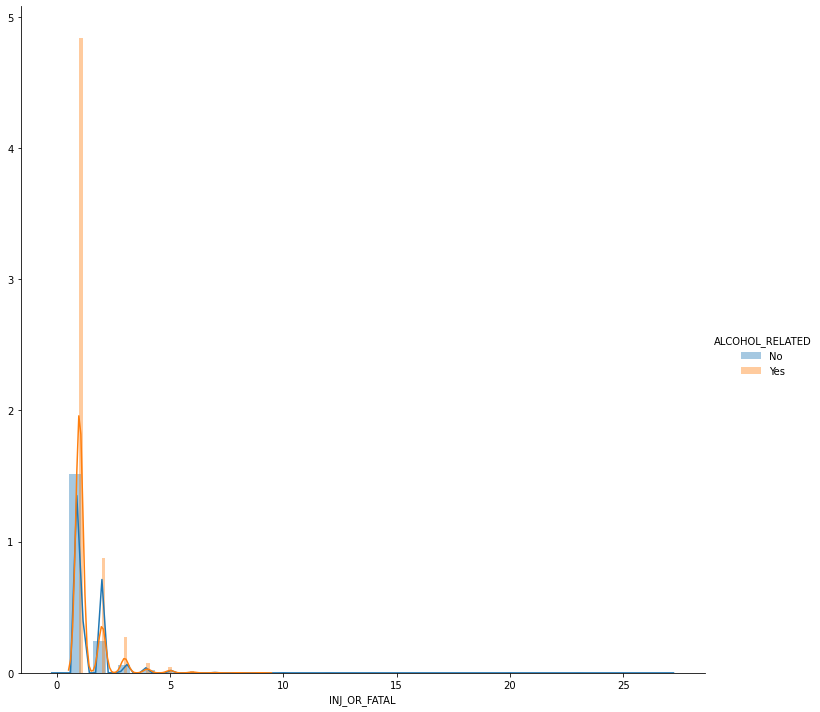

In [19]:
sns.FacetGrid(data= data,hue='ALCOHOL_RELATED', height= 10 ).map(sns.distplot,'INJ_OR_FATAL').add_legend()

In [20]:
cat_features_list

['ACCIDENT_TIME',
 'ACCIDENT_TYPE',
 'DAY_OF_WEEK',
 'DCA_CODE',
 'HIT_RUN_FLAG',
 'LIGHT_CONDITION',
 'ROAD_GEOMETRY',
 'SPEED_ZONE']

In [21]:
def get_count_percent(variable):
    count= data[variable].value_counts()
    percent= data[variable].value_counts(normalize = True).mul(100).round(1).astype(str)+'%'
    df= pd.DataFrame({'count':count,'percentage':percent})
    return df


In [22]:
get_count_percent('ACCIDENT_TYPE')

,count,percentage
Collision with vehicle,47239,63.1%
Collision with a fixed object,11774,15.7%
Struck Pedestrian,6621,8.8%
Vehicle overturned (no collision),3713,5.0%
No collision and no object struck,3633,4.8%
Struck animal,760,1.0%
collision with some other object,711,0.9%
Fall from or in moving vehicle,400,0.5%
Other accident,57,0.1%


In [23]:
get_count_percent('DAY_OF_WEEK')


,count,percentage
Friday,11371,15.5%
Thursday,11363,15.5%
Wednesday,11128,15.2%
Tuesday,10813,14.7%
Monday,10369,14.1%
Sunday,9569,13.0%
Saturday,8819,12.0%


In [24]:
get_count_percent('HIT_RUN_FLAG')

,count,percentage
No,70736,94.4%
Yes,3825,5.1%
Not known,347,0.5%


In [25]:
get_count_percent('LIGHT_CONDITION')

,count,percentage
Day,48990,65.4%
Dark Street lights on,11325,15.1%
Dusk/Dawn,7769,10.4%
Dark No street lights,4056,5.4%
Unk.,1857,2.5%
Dark Street lights unknown,748,1.0%
Dark Street lights off,163,0.2%


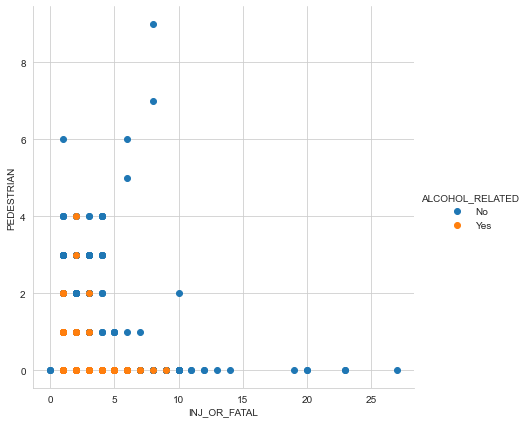

In [26]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue= 'ALCOHOL_RELATED', height= 6).map(plt.scatter, 'INJ_OR_FATAL','PEDESTRIAN' ).add_legend()


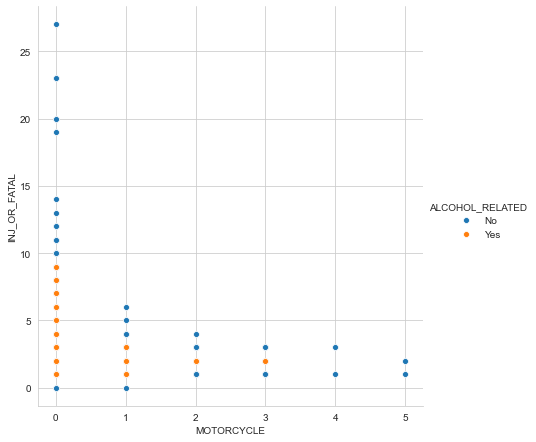

In [27]:

sns.pairplot(data= data, x_vars='MOTORCYCLE', y_vars= 'INJ_OR_FATAL', hue='ALCOHOL_RELATED',height= 6)

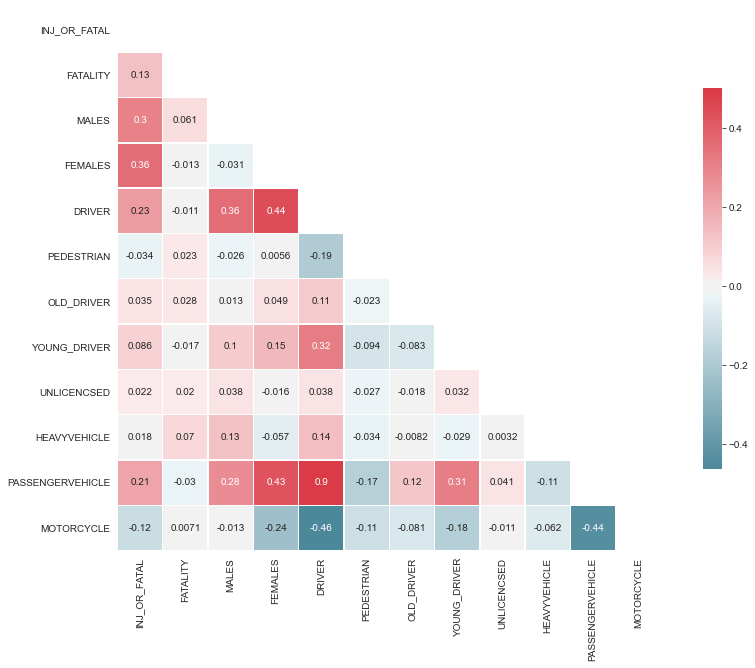

In [28]:
# heat map for numerical features
corr= num_features.corr()

# generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype= np.bool))

# set up the matplotlib figure
fig, ax= plt.subplots(figsize= (15,10))

# generate a custom diverging colormap
cmap= sns.diverging_palette(220,10, as_cmap= True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask= mask, cmap= cmap, vmax= 0.5, center= 0,annot= True ,
            square= True, linewidth= 0.5, cbar_kws={'shrink':0.7})


In [29]:
import copy
cat_features_le= copy.deepcopy(cat_features)

# install scikit- learn
import sys
!{sys.executable} -m pip install scikit-learn

In [30]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()



In [31]:
# storing cate
value_counts=[]
for item in cat_features_list:
    count= cat_features[item].value_counts()
    value_counts.append(count)
    


In [32]:
value_counts

[16.00.00    1139
 15.00.00    1041
 17.00.00    1021
 15.30.00     939
 18.00.00     927
             ... 
 02.51.00       1
 02.16.00       1
 02.28.00       1
 02.39.00       1
 04.32.00       1
 Name: ACCIDENT_TIME, Length: 1424, dtype: int64,
 Collision with vehicle               47239
 Collision with a fixed object        11774
 Struck Pedestrian                     6621
 Vehicle overturned (no collision)     3713
 No collision and no object struck     3633
 Struck animal                          760
 collision with some other object       711
 Fall from or in moving vehicle         400
 Other accident                          57
 Name: ACCIDENT_TYPE, dtype: int64,
 Friday       11371
 Thursday     11363
 Wednesday    11128
 Tuesday      10813
 Monday       10369
 Sunday        9569
 Saturday      8819
 Name: DAY_OF_WEEK, dtype: int64,
 REAR END(VEHICLES IN SAME LANE)                                13200
 RIGHT THROUGH                                                   6554
 CROSS

need to convert category columns to 'category' datatype before Label encoding. By default, a non-numerical column is of 'object' datatype. 

In [33]:
cat_features_le.dtypes

ACCIDENT_TIME      object
ACCIDENT_TYPE      object
DAY_OF_WEEK        object
DCA_CODE           object
HIT_RUN_FLAG       object
LIGHT_CONDITION    object
ROAD_GEOMETRY      object
SPEED_ZONE         object
dtype: object

In [39]:
# need to convert 
cat_features_le= cat_features_le.astype('str').astype('category')

In [35]:
cat_features_le.dtypes

ACCIDENT_TIME      category
ACCIDENT_TYPE      category
DAY_OF_WEEK        category
DCA_CODE           category
HIT_RUN_FLAG       category
LIGHT_CONDITION    category
ROAD_GEOMETRY      category
SPEED_ZONE         category
dtype: object

In [40]:
for item in cat_features_list:
    cat_features_le[item]= le.fit_transform(cat_features_le[item])

In [41]:
cat_features_le['HIT_RUN_FLAG'].value_counts()

0    70736
2     3825
1      347
Name: HIT_RUN_FLAG, dtype: int64

In [42]:
cat_features_le['ACCIDENT_TYPE'].value_counts()

1    47239
0    11774
5     6621
7     3713
3     3633
6      760
8      711
2      400
4       57
Name: ACCIDENT_TYPE, dtype: int64

In [43]:
cat_features_le['DAY_OF_WEEK'].value_counts()

0    11371
4    11363
6    11128
5    10813
1    10369
3     9569
2     8819
7     1476
Name: DAY_OF_WEEK, dtype: int64

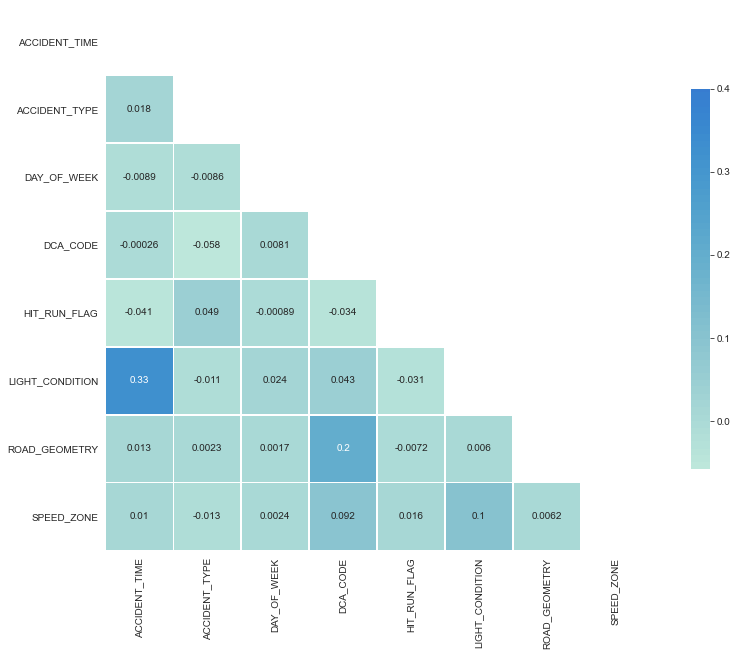

In [44]:
# heat map for categorical features after label encoding
corr= cat_features_le.corr()
# create a mask for upper triangle
mask= np.triu(np.ones_like(corr, dtype= np.bool))
# set up the matplotlib figure
fig, ax= plt.subplots( figsize= (15,10))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask= mask, vmax=0.4,
           center= True, annot= True, square= True, linewidth= 0.5, 
           cbar_kws={'shrink':0.7})


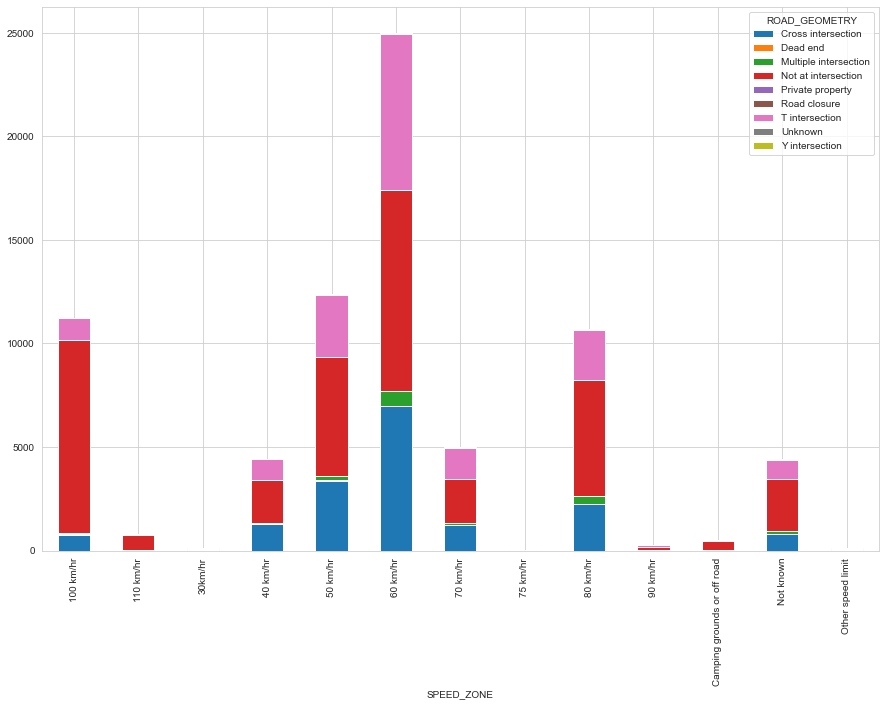

In [46]:
speed_vs_geometry= pd.crosstab(index= data['SPEED_ZONE'], columns= data['ROAD_GEOMETRY'])
speed_vs_geometry.plot(kind= 'bar', stacked= True, figsize=(15,10))

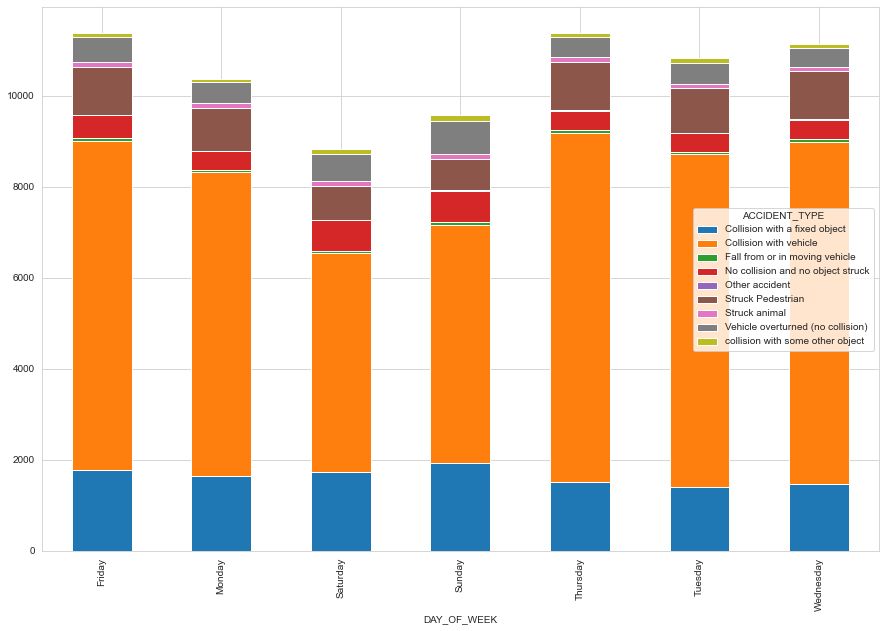

In [47]:
day_vs_acc= pd.crosstab(index= data['DAY_OF_WEEK'], columns= data['ACCIDENT_TYPE'])
day_vs_acc.plot(kind= 'bar', stacked= True, figsize=(15,10))

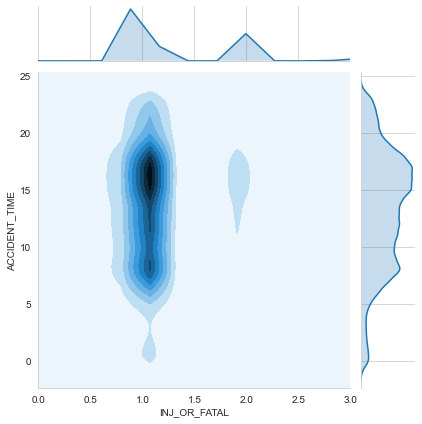

In [56]:
data_accident_time= data['ACCIDENT_TIME'].str[:2].astype(float).fillna(0.0)
sns.jointplot(x= data['INJ_OR_FATAL'], y=data_accident_time,kind='kde', xlim=(0,3) )